# 1. Data Wrangling

## 1.1 Data Loading

In this notebook, I explore the mental health in tech workplace based on the survay was done at 2017. So, the objective is to build Classifiers to predict whether an employee:
1) will be willing to raise mental health issues with future employers

2) will seek professional diagnosis for mental health issue

3) will seek treatment for mental health issue

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 64)
df= pd.read_csv ('mental-heath-in-tech-2016_20161114.csv')

In [3]:
df.head(3)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

In [4]:
df.shape

(1433, 63)

In [5]:
df.columns

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that dis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/organization?     

## 1.2. Data Exploration & Cleaning:

Let's explore some questions: 



In [7]:
df["Are you self-employed?"].value_counts()


0    1146
1     287
Name: Are you self-employed?, dtype: int64

I will remove the self employed people. 

In [8]:
df1 = df.copy()
df1 = df1[df1["Are you self-employed?"]==0]
df1.shape 

(1146, 63)

In [9]:
df1.describe(include=['O'])


,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental illness?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Have your observations of how another indivi

As you see above, some columns are empty and will be removed. The irrelevant columns will be removed as well.

In [10]:
def col_ls(df):
    '''
    Prints out column names of df and its column index
    for ease of reading.
    
    Also returns a list of column names.'''
    ls = []
    for i, c in enumerate(df.columns):
        print(i, c)
        ls.append(c)
    return ls

In [11]:
col_ls(df1)

0 Are you self-employed?
1 How many employees does your company or organization have?
2 Is your employer primarily a tech company/organization?
3 Is your primary role within your company related to tech/IT?
4 Does your employer provide mental health benefits as part of healthcare coverage?
5 Do you know the options for mental health care available under your employer-provided coverage?
6 Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
7 Does your employer offer resources to learn more about mental health concerns and options for seeking help?
8 Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
9 If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
10 Do you think that discussing a mental health disorder with your employer would have negative consequences?

['Are you self-employed?',
 'How many employees does your company or organization have?',
 'Is your employer primarily a tech company/organization?',
 'Is your primary role within your company related to tech/IT?',
 'Does your employer provide mental health benefits as part of healthcare coverage?',
 'Do you know the options for mental health care available under your employer-provided coverage?',
 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
 'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
 'Do you think that discussing a mental health disorder with your employer would have neg

In [12]:
empty_col = [
            "Do you know local or online resources to seek help for a mental health disorder?",
            "If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?",
            "If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?",
            "If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?",
            "If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",
            "Do you believe your productivity is ever affected by a mental health issue?",
            "If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?"]
irre_col = ["Are you self-employed?",
            "What US state or territory do you work in?",
           "What US state or territory do you live in?",
           "What country do you live in?",
           "Why or why not?",
           "Why or why not?.1"]
df2 = df1.copy()
df2 = df2.drop(empty_col+irre_col,axis=1)

In [13]:
df2.describe(include=['O'])


,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up a mental health issue with a potential employer in an interview?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental illness?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,"If yes, what condition(s) have you been diagnosed with?","If maybe, what condition(s) do you believe you have?",Have you been diagnosed with a mental health condition by a medical professional?,"If so, what condition(s) were you diagnosed with?","If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your gender?,What country do you work in?,Which of th

Let's explore null values in each column. All the unique values in each column are also explored.

In [14]:
def explore(df):
    '''
    Prints out columns, its unique values and value counts,
    as well as null value count.
    '''
    for i, c in enumerate(df.columns):
        print(i,c)
        print()
        unique = df[c].unique()
        if len(unique) > 10:
            print("### More than 10 unique values. ###")
            print('### Special attention required for col\n{} {}\n###'.format(i,c))
            print()
        else:
            print(unique)
            print()
            print(df[c].value_counts())
            vc = df[c].value_counts().sum()
            print()
            print("Value count: ",vc)
        nc = df[c].isna().sum()
        print("Null value count: ",nc)
        print("Null %: {:.2f}%".format(100*nc/(nc+vc)))            
        print()

In [15]:
explore(df)

0 Are you self-employed?

[0 1]

0    1146
1     287
Name: Are you self-employed?, dtype: int64

Value count:  1433
Null value count:  0
Null %: 0.00%

1 How many employees does your company or organization have?

['26-100' '6-25' nan 'More than 1000' '100-500' '500-1000' '1-5']

26-100            292
More than 1000    256
100-500           248
6-25              210
500-1000           80
1-5                60
Name: How many employees does your company or organization have?, dtype: int64

Value count:  1146
Null value count:  287
Null %: 20.03%

2 Is your employer primarily a tech company/organization?

[ 1. nan  0.]

1.00    883
0.00    263
Name: Is your employer primarily a tech company/organization?, dtype: int64

Value count:  1146
Null value count:  287
Null %: 20.03%

3 Is your primary role within your company related to tech/IT?

[nan  1.  0.]

1.00    248
0.00     15
Name: Is your primary role within your company related to tech/IT?, dtype: int64

Value count:  263
Null value co

In the next step, all categorical values will be replaced by numerical values for the ease of use in the modeling part.

In [16]:
df_explore = df.copy()

In [17]:
dict_number_employee = {'1-5':1,
        '6-25':6,
        '26-100':26,
        '100-500':101,
        '500-1000':501,
        'More than 1000':1001}

In [18]:
df_explore['How many employees does your company or organization have?'] = df_explore['How many employees does your company or organization have?'].replace(dict_number_employee)


In [19]:
# All nan values are replaced by -1.
col = "Is your primary role within your company related to tech/IT?"
df_explore[col] = df_explore[col].fillna(-1)

In [20]:
col = "Does your employer provide mental health benefits as part of healthcare coverage?"

dict_healthcare = {'Yes':1, 
        "I don't know":2,
        'No':3,
        'Not eligible for coverage / N/A':-1
        }
df_explore[col] = df_explore[col].replace(dict_healthcare)

In [21]:
col = "Do you know the options for mental health care available under your employer-provided coverage?"

df_explore[col] = df_explore[col].fillna(-1)
dict1 = {'Yes':1, 
        'I am not sure':2, 
        'No':3,
        }
df_explore[col]=df_explore[col].replace(dict1)

In [22]:
col = "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?"
df_explore[col] = df_explore[col].fillna(-1) #for NA
dict1 = {'Yes':1, 
        "I don't know":2, 
        'No':3,
        }
df_explore[col]=df_explore[col].replace(dict1)

In [23]:
col = "Does your employer offer resources to learn more about mental health concerns and options for seeking help?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {'Yes':1, 
        "I don't know":2, 
        'No':3,
        }
df_explore[col]=df_explore[col].replace(dict1)

In [24]:
col = "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {'Yes':1, 
        "I don't know":2, 
        'No':3,
        }

df_explore[col] = df_explore[col].replace(dict1)

In [25]:
col = "If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {"Very easy":1, 
        "Somewhat easy":2, 
        "Neither easy nor difficult":3,
         "I don't know":3,
         "Somewhat difficult":4,
         "Very difficult":5
        }
df_explore[col] = df_explore[col].replace(dict1)

In [26]:
col = "Do you think that discussing a mental health disorder with your employer would have negative consequences?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {'Yes':1, 
        'Maybe':2, 
         'No':3,
        }
df_explore[col] = df_explore[col].replace(dict1)

In [27]:
col = "Do you think that discussing a physical health issue with your employer would have negative consequences?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {'Yes':1, 
        'Maybe':2, 
         'No':3,
        }

df_explore[col] = df_explore[col].replace(dict1)

###
col = "Would you feel comfortable discussing a mental health disorder with your coworkers?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {'Yes':1, 
        'Maybe':2, 
         'No':3,
        }

df_explore[col] = df_explore[col].replace(dict1)

###
col = "Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?"
df_explore[col] = df_explore[col].fillna(-1) 
rp_dt = {'Yes':1, 
        'Maybe':2, 
         'No':3,
        }

df_explore[col] = df_explore[col].replace(dict1)


In [28]:
###
col = "Do you feel that your employer takes mental health as seriously as physical health?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {'Yes':1, 
        "I don't know":2, 
         'No':3,
        }

df_explore[col] = df_explore[col].replace(dict1)

###
col = "Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {'Yes':1, 
        'No':2,
        }

df_explore[col] = df_explore[col].replace(dict1)

###
col = "Do you have previous employers?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {0:2 
        }

df_explore[col] = df_explore[col].replace(dict1)

###
col = "Have your previous employers provided mental health benefits?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {'Yes, they all did':1, 
        'Some did':2,
        "I don't know":3,
         'No, none did':4
        }

df_explore[col] = df_explore[col].replace(dict1)

###
col = "Were you aware of the options for mental health care provided by your previous employers?"
df_explore[col] = df_explore[col].fillna(-1)
dict1 = {'Yes, I was aware of all of them':1, 
        'I was aware of some':2, 
        'No, I only became aware later':3,
         'N/A (not currently aware)':4
        }

df_explore[col] = df_explore[col].replace(dict1)

###
col = "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?"
df_explore[col] = df_explore[col].fillna(-1) 
rp_dt = {'Yes, they all did':1, 
        'Some did':2, 
        "I don't know":3,
         'None did':4
        }

df_explore[col] = df_explore[col].replace(dict1)


In [29]:
###
col = "Did your previous employers provide resources to learn more about mental health issues and how to seek help?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {'Yes, they all did':1, 
        'Some did':2, 
        "I don't know":3,
         'None did':4
        }

df_explore[col] = df_explore[col].replace(dict1)

###
col = "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {'Yes, always':1, 
        'Sometimes':2, 
        "I don't know":3,
         'No':4
        }

df_explore[col] = df_explore[col].replace(dict1)

###
col = "Do you think that discussing a mental health disorder with previous employers would have negative consequences?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {'Yes, all of them':1, 
        'Some of them':2, 
        "I don't know":3,
         'None of them':4
        }

df_explore[col] = df_explore[col].replace(dict1)

###
col = "Do you think that discussing a physical health issue with previous employers would have negative consequences?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {'Yes, all of them':1, 
        'Some of them':2, 
         'None of them':3
        }

df_explore[col] = df_explore[col].replace(dict1)

###
col = "Would you have been willing to discuss a mental health issue with your previous co-workers?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {'Yes, at all of my previous employers':1, 
        'Some of my previous employers':2, 
         'No, at none of my previous employers':3
        }

df_explore[col] = df_explore[col].replace(dict1)


In [30]:
col = "Would you have been willing to discuss a mental health issue with your direct supervisor(s)?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {'Yes, at all of my previous employers':1, 
        'Some of my previous employers':2, 
         "I don't know":3,
         'No, at none of my previous employers':4
        }

df_explore[col] = df_explore[col].replace(dict1)

###
col = "Did you feel that your previous employers took mental health as seriously as physical health?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {'Yes, they all did':1, 
        'Some did':2, 
        "I don't know":3,
         'None did':4
        }

df_explore[col] = df_explore[col].replace(dict1)

###
col = "Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {'Yes, all of them':1, 
        'Some of them':2, 
         'None of them':3
        }

df_explore[col] = df_explore[col].replace(dict1)

###
col = "Would you be willing to bring up a physical health issue with a potential employer in an interview?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {'Yes':1, 
        'Maybe':2, 
         'No':3,
        }

df_explore[col] = df_explore[col].replace(dict1)

###
col = "Would you bring up a mental health issue with a potential employer in an interview?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {'Yes':1, 
        'Maybe':2, 
         'No':3,
        }

df_explore[col] = df_explore[col].replace(dict1)

###
col = "Do you feel that being identified as a person with a mental health issue would hurt your career?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {'Yes, it has':1, 
        'Yes, I think it would':2, 
        'Maybe':3,
         "No, I don't think it would":4,
         'No, it has not':5
        }

df_explore[col] = df_explore[col].replace(dict1)

###
col = "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {'Yes, they do':1, 
         'Yes, I think they would':2, 
        'Maybe':3,
         "No, I don't think they would":4,
         'No, they do not':5
        }

df_explore[col] = df_explore[col].replace(dict1)

###
col = "How willing would you be to share with friends and family that you have a mental illness?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {'Very open':1, 
         'Somewhat open':2, 
        'Neutral':3,
         'Somewhat not open':4,
         'Not open at all':5,
         'Not applicable to me (I do not have a mental illness)':-1
        }

df_explore[col] = df_explore[col].replace(dict1)

###
col = "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {'Yes, I experienced':1, 
         'Yes, I observed':2, 
        'Maybe/Not sure':3,
         'No':4,
        }

df_explore[col] = df_explore[col].replace(dict1)

###
col = "Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?"
# nan values is 55.41%; unsure what is the cause of nan values
# drop column
df_explore = df_explore.drop([col],axis=1)

###
col = "Do you have a family history of mental illness?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {'Yes':1, 
        "I don't know":2, 
        'No':3,
        }

df_explore[col] = df_explore[col].replace(dict1)

###
col = "Have you had a mental health disorder in the past?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {'Yes':1, 
        'Maybe':2, 
         'No':3,
        }

df_explore[col] = df_explore[col].replace(dict1)

###
col = "Do you currently have a mental health disorder?"
# potential target column or key X column
df_explore[col] = df_explore[col].fillna(-1) 
rp_dt = {'Yes':1, 
        'Maybe':2, 
         'No':3,
        }

df_explore[col] = df_explore[col].replace(dict1)

###
col = "Have you been diagnosed with a mental health condition by a medical professional?"
df_explore[col] = df_explore[col].fillna(-1) 
rp_dt = {'Yes':1, 
        'No':2, 
        }

df_explore[col] = df_explore[col].replace(dict1)

###
col = "Have you ever sought treatment for a mental health issue from a mental health professional?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {1:1, 
        0:2,
        }

df_explore[col] = df_explore[col].replace(dict1)

###
col = "If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {'Often':1, 
        'Sometimes':2, 
        'Rarely':3,
        'Never':4,
        'Not applicable to me':-1}

df_explore[col] = df_explore[col].replace(dict1)

###
col = "If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {'Often':1, 
        'Sometimes':2, 
        'Rarely':3,
        'Never':4,
        'Not applicable to me':-1}

df_explore[col] = df_explore[col].replace(dict1)

###
col = "Do you work remotely?"
df_explore[col] = df_explore[col].fillna(-1) 
dict1 = {'Always':1, 
        'Sometimes':2, 
        'Never':3,
       }

df_explore[col] = df_explore[col].replace(dict1)

#####
df_explore.describe(include='all')

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

In [31]:
df_explore["Is your employer primarily a tech company/organization?"].value_counts()


1.00    883
0.00    263
Name: Is your employer primarily a tech company/organization?, dtype: int64

In [32]:
df1 = df_explore.copy()
df1 = df1[df1["Is your employer primarily a tech company/organization?"].isin([-1,1])]

In [33]:
# rename first column, drop other column
err_msg = "Column has been dropped, renamed, or does not exist."
try: 
    df1 = df1.rename(columns={"Is your employer primarily a tech company/organization?":"tech_company_or_role"})
    df1 = df1.drop(["Is your primary role within your company related to tech/IT?"],axis=1)
except:
    print(err_msg)
    
df1.head(1)   

,Are you self-employed?,How many employees does your company or organization have?,tech_company_or_role,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental

In [34]:
df1 = df1.drop(["If yes, what condition(s) have you been diagnosed with?",
         "If maybe, what condition(s) do you believe you have?",
               "If so, what condition(s) were you diagnosed with?"],axis=1)

All the gender values got cleaned.

In [35]:
df1['What is your gender?'].value_counts().head(10)

Male       390
male       155
Female      88
female      57
M           53
m           42
F           17
f           17
Female       5
Male         4
Name: What is your gender?, dtype: int64

In [36]:
df2 = df1.copy()

male_ls = ['Male','male', 'Male ', 'M', 'm', 'man', 'Cis male',
           'Male.', 'Male (cis)', 'Man', 'Sex is male',
           'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
           'mail', 'M|', 'male ', 'Cis Male', 'Male (trans, FtM)',
           'cisdude', 'cis man', 'MALE']

female_ls = ['Female','female', 'I identify as female.', 'female ',
             'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
             'Cis female', 'Transitioned, M2F', 'Female or Multi-Gender Femme',
             'Female ', 'woman', 'female/woman', 'Cisgender Female', 
             'mtf', 'fem', 'Female (props for making this a freeform field, though)',
             ' Female', 'Cis-woman', 'AFAB', 'Transgender woman',
             'Cis female ']

other_ls = ['Bigender', 'non-binary,', 'Genderfluid (born female)',
            'Other/Transfeminine', 'Androgynous', 'male 9:1 female, roughly',
            'nb masculine', 'genderqueer', 'Human', 'Genderfluid',
            'Enby', 'genderqueer woman', 'Queer', 'Agender', 'Fluid',
            'Genderflux demi-girl', 'female-bodied; no feelings about gender',
            'non-binary', 'Male/genderqueer', 'Nonbinary', 'Other', 'none of your business',
            'Unicorn', 'human', 'Genderqueer']

df2["What is your gender?"] = df2["What is your gender?"].replace(male_ls,1)
df2["What is your gender?"] = df2["What is your gender?"].replace(female_ls,2)
df2["What is your gender?"] = df2["What is your gender?"].replace(other_ls,3)
df2["What is your gender?"] = df2["What is your gender?"].fillna(3)
df2["What is your gender?"].unique()








array([1., 2., 3.])

Then, all the countries name replaced by index.

In [37]:
df3 = df2.copy()
country = {}
for idx, name in enumerate(df3['What country do you work in?'].unique()):
#     print(idx, name)
    country[name] = idx
# country_rp_dt
df3['What country do you work in?'] = df3['What country do you work in?'].replace(country)

I will drop work position column for now.

In [38]:
df4 = df3.drop(["Which of the following best describes your work position?"],axis=1)
df4.head(1)

,Are you self-employed?,How many employees does your company or organization have?,tech_company_or_role,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental

In [39]:
column_name = col_ls(df3)


0 Are you self-employed?
1 How many employees does your company or organization have?
2 tech_company_or_role
3 Does your employer provide mental health benefits as part of healthcare coverage?
4 Do you know the options for mental health care available under your employer-provided coverage?
5 Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
6 Does your employer offer resources to learn more about mental health concerns and options for seeking help?
7 Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
8 If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
9 Do you think that discussing a mental health disorder with your employer would have negative consequences?
10 Do you think that discussing a physical health issue with your employer would have negative con

In [40]:

replace_name = {
    "How many employees does your company or organization have?":"num_employees",
    "Does your employer provide mental health benefits as part of healthcare coverage?":"cep_benefits",
    "Do you know the options for mental health care available under your employer-provided coverage?":"cep_know_options",
    "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?":"cep_discuss",
    "Does your employer offer resources to learn more about mental health concerns and options for seeking help?":"cep_learn",
    "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?":"cep_anon",
    "If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:":"cep_mh_leave",
    "Do you think that discussing a mental health disorder with your employer would have negative consequences?":"cep_mh_ncsq",
    "Do you think that discussing a physical health issue with your employer would have negative consequences?":"cep_ph_ncsq",
    "Would you feel comfortable discussing a mental health disorder with your coworkers?":"cep_comf_cw",
    "Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?":"cep_comf_sup",
    "Do you feel that your employer takes mental health as seriously as physical health?":"cep_serious",
    "Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?":"cep_others_ncsq",
    "Do you have previous employers?":"pep_have",
    "Have your previous employers provided mental health benefits?":"pep_benefits",
    "Were you aware of the options for mental health care provided by your previous employers?":"pep_know_options",
    "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?":"pep_discuss",
    "Did your previous employers provide resources to learn more about mental health issues and how to seek help?":"pep_learn",
    "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?":"pep_anon",
    "Do you think that discussing a mental health disorder with previous employers would have negative consequences?":"pep_mh_ncsq",
    "Do you think that discussing a physical health issue with previous employers would have negative consequences?":"pep_ph_ncsq",
    "Would you have been willing to discuss a mental health issue with your previous co-workers?":"pep_comf_cw",
    "Would you have been willing to discuss a mental health issue with your direct supervisor(s)?":"pep_comf_sup",
    "Did you feel that your previous employers took mental health as seriously as physical health?":"pep_serious",
    "Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?":"pep_others_ncsq",
    "Would you be willing to bring up a physical health issue with a potential employer in an interview?":"fep_ph_willing",
    "Would you bring up a mental health issue with a potential employer in an interview?":"fep_mh_willing",
    "Do you feel that being identified as a person with a mental health issue would hurt your career?":"hurt_career",
    "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?":"cw_view_neg",
    "How willing would you be to share with friends and family that you have a mental illness?":"comf_ff",
    "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?":"neg_response",
    "Do you have a family history of mental illness?":"mh_fam_hist",
    "Have you had a mental health disorder in the past?":"mh_hist",
    "Do you currently have a mental health disorder?":"mh_cur",
    "Have you been diagnosed with a mental health condition by a medical professional?":"mh_diag_pro",
    "Have you ever sought treatment for a mental health issue from a mental health professional?":"sought_treat",
    "If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?":"work_affect_effect",
    "If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?":"work_affect_ineffect",
    "What is your age?":"age",
    "What is your gender?":"gender",
    "What country do you work in?":"work_country",
    "Do you work remotely?":"work_remote"
}

df5=df4.rename(columns=replace_name)

## 1.3. Data Visualization

### 1.3.1. Mental Health Across Age & Gender

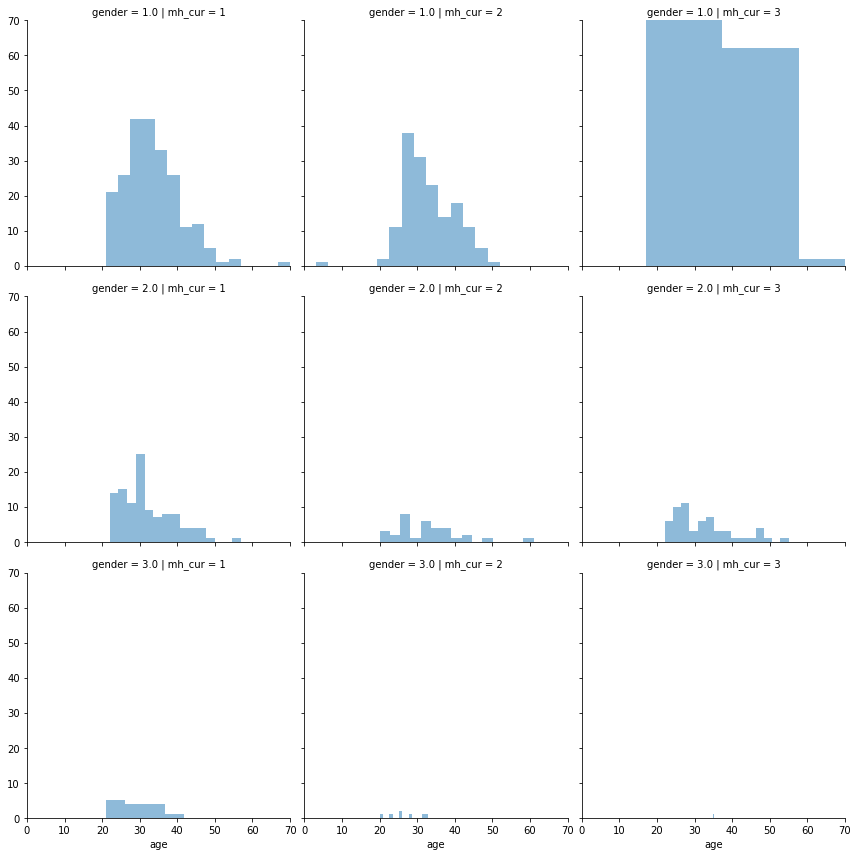

In [42]:
g = sns.FacetGrid(df5,row="gender",col="mh_cur",size=4)
g.map(plt.hist,'age',alpha=0.5,bins=15)
g.add_legend()
g.set(xlim=(0, 70), ylim=(0, 70))

plt.show()

* Most of males did not have mental problems
* Most of mental problems happened in the ages between 20-40 years old.

In [45]:
df_explore["If so, what condition(s) were you diagnosed with?"].describe()


count                                                   711
unique                                                  116
top       Mood Disorder (Depression, Bipolar Disorder, etc)
freq                                                    187
Name: If so, what condition(s) were you diagnosed with?, dtype: object